In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [3]:
ROOT_PATH = '/home/tang/tang/'
load_data_directory = os.path.join(ROOT_PATH,"outPut5/simple")
train_data_directory = os.path.join(ROOT_PATH, "outPut5/test")
#test_data_directory = os.path.join(ROOT_PATH, "outPut/val")

In [4]:
Images,Labels= load_data(load_data_directory)

(array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([ 0.        ,  0.86111111,  1.72222222,  2.58333333,  3.44444444,
         4.30555556,  5.16666667,  6.02777778,  6.88888889,  7.75      ,
         8.61111111,  9.47222222, 10.33333333, 11.19444444, 12.05555556,
        12.91666667, 13.77777778, 14.63888889, 15.5       , 16.36111111,
        17.22222222, 18.08333333, 18.94444444, 19.80555556, 20.66666667,
        21.52777778, 22.38888889, 23.25      , 24.11111111, 24.97222222,
        25.83333333, 26.69444444, 27.55555556, 28.41666667, 29.27777778,
        30.13888889, 31.        ]),
 <a list of 36 Patch objects>)

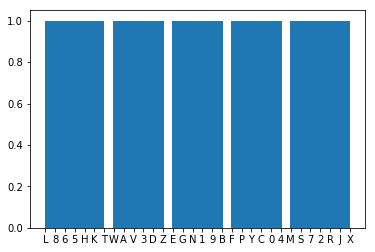

In [5]:
plt.hist(Labels,36)

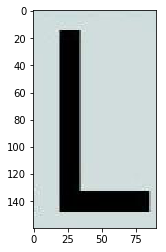

In [6]:
imgplot = plt.imshow(Images[0])

In [7]:
#add value 15 in hsv images,yellow will change into green
i=0
random.uniform(-1,1)

for p in range(0,32*1):
    
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    for j in range(1,41):
        #40images add 1 on hue
        
        
        turn_green_hsv = img_hsv.copy()
        MIN = np.min(turn_green_hsv[:,:,0])
        MAX = np.max(turn_green_hsv[:,:,0])
        random_factor = random.uniform(-MIN,255-MAX)
        turn_green_hsv[:, :, 0] = turn_green_hsv[:, :, 0]+random_factor
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
       
        #print('factor=',random_factor)
        #print('h=',turn_green_hsv[:,:,0])
        filename=train_data_directory+ '/' + Labels[i] + '/' + Labels[i]+'_hsv_h'+str(j)+'.jpg'
        plt.imsave(filename, turn_green_img)
    #print(filename)
    i+=1


In [8]:
#saturation half of before
i=0

for p in range(0,32):
    
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    
    for j in range(1,41):
        #40images in saturation
      
        colorless_hsv = img_hsv.copy()
        MIN = np.min(colorless_hsv[:,:,1])
        MAX = np.max(colorless_hsv[:,:,1])
        random_factor = random.uniform(-MIN,255-MAX+1)
        colorless_hsv[:, :, 1] = (random_factor + colorless_hsv[:, :, 1])
        #print('factor=',random_factor)
        #print('s=',colorless_hsv[:,:,1])
        colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
    

        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_hsv_s_'+str(j)+'.jpg'
        plt.imsave(filename, colorless_img)
    #print(filename)
    i+=1

In [9]:
#value change into half before
i=0

for p in range(0,32):
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    
    for j in range(1,41):
        darker_hsv = img_hsv.copy()
        MIN = np.min(darker_hsv[:,:,2])
        MAX = np.max(darker_hsv[:,:,2])
        random_factor = random.uniform(-MIN,255-MAX+1)
        darker_hsv[:, :, 2] = random_factor+darker_hsv[:, :, 2]
        darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_hsv_v_'+str(j)+'.jpg'
        plt.imsave(filename, darker_img)
    #print(filename)
    i+=1
        

In [10]:
#gamma_trans
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)
#chang gamma into half of before
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(1,41):#8 images with gamma
        random_factor = random.uniform(0,10)
        img_corrected = gamma_trans(img,random_factor)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+ Labels[i]+'_gamma_'+str(j)+'.jpg'
        plt.imsave(filename, img_corrected)
    #print(filename)
    i+=1

In [11]:
#######################################################################################################3
########################################################################################################
##########################################################################################################
#projective transformer

In [12]:
#######scaling
i=0
M_crop_elephant = np.array([
    [1.6, 0, -2],
    [0, 1.6, -1]
], dtype=np.float32)
for p in range(0,32):
    img = Images[i]
    for j in range(1,81):#80 images with scaling
        row, col, ch = img.shape 
        random_factor1 = random.uniform(-0.8*col,0.8*col)
        random_factor2 = random.uniform(-0.8*row,0.8*row)
        M_crop_elephant = np.array([[1.0+random_factor1, 0, 0],[0, 1.0+random_factor2, 0]], dtype=np.float32)
       
        img_elephant = cv2.warpAffine(img, M_crop_elephant, (90,160))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_scaling_'+str(j)+'.jpg'
        plt.imsave(filename, img_elephant)
    #print(filename)
    i+=1

In [13]:
theta = 1 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(1,41):#50 degree max
        random_factor = random.uniform(-30,30)
        theta = 1 *random_factor* np.pi / 180
        M_shear = np.array([[1, np.tan(theta), 0],[0, 1, 0]], dtype=np.float32)
        
    
        img_sheared = cv2.warpAffine(img, M_shear, (90,160))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_sheared_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_sheared)
    #print(filename)
    i+=1

In [14]:
#rotation rotated 15 degree
i=0
theta = 1 * np.pi / 180
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)
i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,41):#max 45
        random_factor = random.uniform(-30,30)
        theta = 1 *random_factor* np.pi / 180
        M_rotate = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0]], dtype=np.float32)
        img_rotated15 = cv2.warpAffine(img, M_rotate, (90,160))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_rotate_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_rotated15)
    #print(filename)
    i+=1

In [15]:
#translation



i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,6):#max 45
        random_factor1 = random.uniform(-3,3)
        random_factor1 = random.uniform(-3,3)
        
        
        
        M_trans = np.array([[1, 0, random_factor1],[0, 1, random_factor2]], dtype=np.float32)
        #print('factor1=',random_factor1)
        #print('factor2=',random_factor2)
        img_translation = cv2.warpAffine(img, M_trans, (90,160))
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_translation_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_translation)
    #print(filename)
    i+=1

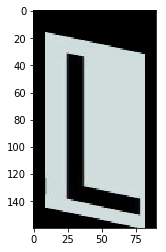

In [16]:
img = Images[0]
rows, cols, ch = img.shape  
  
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])  
pts2 = np.float32([[cols * 0.1, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])  
  
M = cv2.getAffineTransform(pts1, pts2)  
dst = cv2.warpAffine(img, M, (cols, rows))  
  
plt.imshow(dst) 

In [17]:
i=0
for p in range(0,32):
    img = Images[i]
    for j in range(0,201):
        rows, cols, ch = img.shape  
        random_factor1 = random.uniform(-1,1)+1
        random_factor2 = random.uniform(-1,1)+1
        random_factor3 = random.uniform(-1,1)+1
        random_factor4 = random.uniform(-1,1)+1
        random_factor5 = random.uniform(-1,1)+1
        random_factor6 = random.uniform(-1,1)+1
        
        
        pts1 = np.float32([[0, 0], [cols -1, 0], [0, rows - 1],[cols-1,rows-1]]) 
        
        """pts2 = np.float32([[cols * 0.9*random_factor1, rows * 0.1*random_factor2],
                           [cols * 0.1*random_factor3, rows * 0.9*random_factor4], 
                           [-cols * 1/random_factor5, -rows * 1/random_factor6]])  """
        pts2 = np.float32([[cols * 0.1*random_factor1, rows * 0.1*random_factor2],
                           [cols * 0.1*random_factor3, rows * 0.9*random_factor4], 
                           [cols * 0.9*random_factor5, rows * 0.1*random_factor6],
                          [cols * 0.9*random_factor5, rows * 0.9*random_factor6]])
          
        M = cv2.getPerspectiveTransform(pts1,pts2) 
        dst = cv2.warpPerspective(img, M, (cols, rows))  
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_projective_random_'+str(int(j))+'.jpg'
    
        plt.imsave(filename, dst)
        
    #print(filename)
    i+=1

In [18]:
#gaussian noise

i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,81):#max 45
        random_factor1 = random.uniform(-3,3)
        random_factor1 = random.uniform(0,100)
        row,col,ch= img.shape
        mean = random_factor1
        var = random_factor2
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noise = np.array(img + gauss)
        img_noisy = noise.astype(np.uint8)
        
        
        
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_gaussian_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_noisy)
    #print(filename)
    i+=1

In [19]:
#salt&pepper noise

i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,81):#max 45
        random_factor1 = random.uniform(0,1)
        random_factor1 = random.uniform(0,100)
        row,col,ch= img.shape
        s_vs_p = 0.5
        amount = 0.04
        s_p = np.copy(img)
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        s_p[coords] = 1
        
        num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        s_p[coords] = 0
        
        
        
        
        
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_pepper&salt_'+str(1*j)+'.jpg'
        plt.imsave(filename, s_p)
    #print(filename)
    i+=1

In [20]:
#poisson noise

i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,81):#max 45
        
        
        vals = len(np.unique(img))
        vals = 2 ** np.ceil(np.log2(vals))
        poisson = np.random.poisson(img * vals) / (float(vals)*img)
        img_poisson = img+poisson
        
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_poisson_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_poisson)
    #print(filename)
    i+=1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [21]:
#speckle noise

i=0
for p in range(0,32):
    img = Images[i]
    
    for j in range(1,81):#max 45
        random_factor1 = random.uniform(0,2)
        random_factor1 = random.uniform(0,100)
       
       
        
        
        row,col,ch = img.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)
        #print('gauss=',gauss)
        
        speckle = np.array(img + gauss*random_factor1)
        img_speckle = speckle.astype(np.uint8)
        
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_speckle_'+str(1*j)+'.jpg'
        plt.imsave(filename, img_speckle)
    #print(filename)
    i+=1


In [22]:
#blurring random
i=0
for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        row,col,ch = img.shape
        random_factor1=np.random.random((10,20))
        kernel = random_factor1/np.sum(random_factor1)
        
        random_blur = cv2.filter2D(img,-1,kernel)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_random_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, random_blur)
    #print(filename)
    i+=1

In [23]:
#blurring average
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        row,col,ch = img.shape
        
        random_factor1=np.random.randint(1,col-1)
        random_factor2=np.random.randint(1,row-1)
        #print(random_factor1)
        #print(random_factor2)
        
        random_factor3 = np.ones((random_factor2,random_factor1),np.float32)
       
        kernel = random_factor3/np.sum(random_factor3)
        
        average_blur = cv2.filter2D(img,-1,kernel)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_average_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, average_blur)
    #print(filename)
    i+=1

In [24]:
#blurring gaussian
from scipy.ndimage import gaussian_filter
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        row,col,ch = img.shape
        
        random_factor1=np.random.uniform(1,col-1)
        random_factor2=np.random.uniform(1,row-1)
       # print(random_factor1)
       # print(random_factor2)
  
        
        
        gaussian_blur = gaussian_filter(img,sigma=random_factor1**0.5)
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_gaussian_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, gaussian_blur)
    #print(filename)
    i+=1


In [25]:
#blurring percentile
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        row,col,ch = img.shape
        
        random_factor1=np.random.randint(1,20)
        random_factor2=np.random.randint(1,20)
        #print(random_factor1)
        #print(random_factor2)
  
        
        
        percentile_blur = ndimage.percentile_filter(img, percentile=random_factor1, size=random_factor2)
        
        
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_percentile_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, percentile_blur)
    #print(filename)
    i+=1


In [26]:
##

In [27]:
#blurring median
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        row,col,ch = img.shape
        
        random_factor1=np.random.randint(1,(col-1)/10)
        random_factor2=np.random.randint(1,(row-1)/10)
        #print(random_factor1)
        #print(random_factor2)
  
        
        
        median_blur = ndimage.median_filter(img,  size=random_factor2)
        
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_median_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, median_blur)
    #print(filename)
    i+=1

In [28]:
#blurring minima
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        
        random_factor1=np.random.randint(1,(col-1)/10)
        random_factor2=np.random.randint(1,(row-1)/10)
        #print(random_factor1)
        #print(random_factor2)
  
        
        
        minimum_blur = ndimage.minimum_filter(img,  size=random_factor2*0.5)
        
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_minimum_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, minimum_blur)
    #print(filename)
    i+=1

In [29]:
#blurring maximum
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        
        random_factor1=np.random.randint(1,(col-1)/10)
        random_factor2=np.random.randint(1,(row-1)/10)
        #print(random_factor1)
        #print(random_factor2)
  
        
        
        maximum_blur = ndimage.maximum_filter(img,  size=random_factor2*0.3)
        
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_maximum_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, maximum_blur)
    #print(filename)
    i+=1

In [30]:
#blurring bilateral
i=0

for p in range(0,32):
    img = Images[i]
    
    
    
    for j in range(1,41):
        
        random_factor1=np.random.randint(1,(col-1)/10)
        random_factor2=np.random.randint(1,(row-1)/10)
        random_factor3=np.random.randint(1,col*row-1)
        #print(random_factor1)
        #print(random_factor2)
        
        
       
       
        
        bilateral_blur = cv2.bilateralFilter(img,random_factor1,random_factor2,random_factor3)
        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_bilateral_bluring_'+str(j)+'.jpg'
        plt.imsave(filename, bilateral_blur)
    #print(filename)
    i+=1